In [186]:
using Plots
using QuadGK
using Roots
include("./ring_np_num.jl")
include("./average_detour.jl")
include("load_and_process.jl")
pyplot();

# High res runs of systems with 8, 16, 32 and 64 players

In [140]:
ϕ_res = 200
ϕ = LinRange(0,2π, ϕ_res+1)[1:end-1]
ϕ_300 =  LinRange(0,2π, 300+1)[1:end-1];

---

### 8 players low starting prob

In [141]:
b8_low, s8_low, _ = load_run("more_players_no_inc_high_res/8_low/")
s8_low = shift_end_to_beginning.(s8_low);

In [142]:
s8_low_widths = [simple_width(ϕ, p[:,end]) for p in s8_low]
s8_low_widths[1] = 2π;

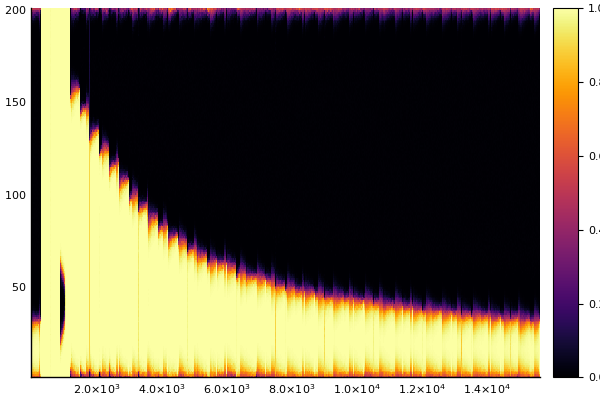

In [143]:
heatmap(hcat(s8_low...))

---

### 8 players, high starting prob

In [144]:
b8_high, s8_high, _ = load_run("more_players_no_inc_high_res/8_high/")
s8_high = shift_end_to_beginning.(s8_high);

In [145]:
s8_high_widths = [simple_width(ϕ, p[:,end]) for p in s8_high]
s8_high_widths[1] = 2π;

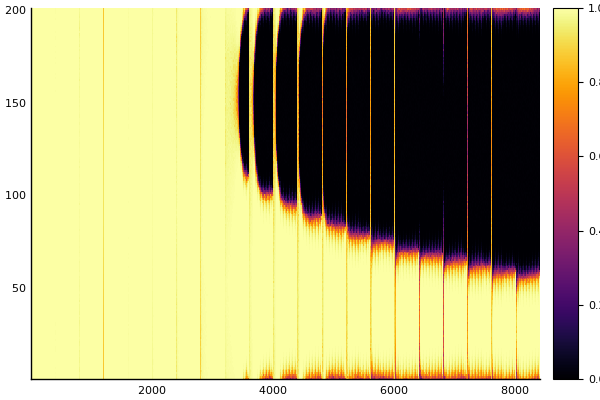

In [146]:
heatmap(hcat(s8_high...))

---

### 16 players with low starting prob

In [147]:
b16_low, s16_low, _ = load_run("more_players_no_inc_high_res/16_low/")
s16_low = shift_end_to_beginning.(s16_low);

In [148]:
s16_low_widths = [simple_width(ϕ, p[:,end]) for p in s16_low]
s16_low_widths[1] = 2π;

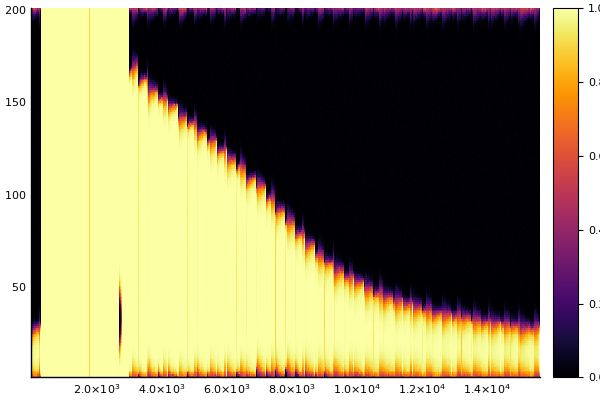

In [149]:
heatmap(hcat(s16_low...))

---

### 16 players with high starting prob

In [150]:
b16_high, s16_high, _ = load_run("more_players_no_inc_high_res/16_high/");
s16_high = shift_end_to_beginning.(s16_high);

In [151]:
s16_high_widths = [simple_width(ϕ, p[:,end]) for p in s16_high]
s16_high_widths[1] = 2π;

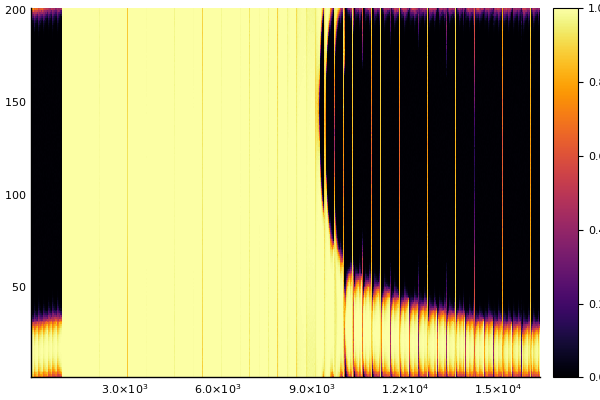

In [152]:
heatmap(hcat(s16_high...))

---
### 32 players with low starting prob

In [153]:
b32_low, s32_low, c32_low, _  = load_run("more_players_no_inc_high_res/32_low/");
s32_low = shift_end_to_beginning.(s32_low);

In [179]:
s32_low_widths = [simple_width(ϕ, p[:,end]) for p in s32_low];
s32_low_widths_08 = [simple_width(ϕ, p[:,end], 0.8) for p in s32_low];

#s32_low_widths[1] = 2π;

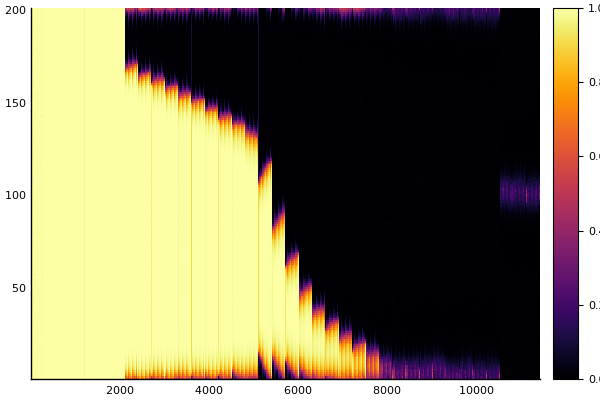

In [155]:
heatmap(hcat(s32_low...))

---
### 32 players with high starting prob

In [156]:
b32_high, s32_high, _ = load_run("more_players_no_inc_high_res/32_high/");
s32_high = shift_end_to_beginning.(s32_high);

In [157]:
s32_high_widths = [simple_width(ϕ, p[:,end]) for p in s32_high];
#s32_low_widths[1] = 2π;

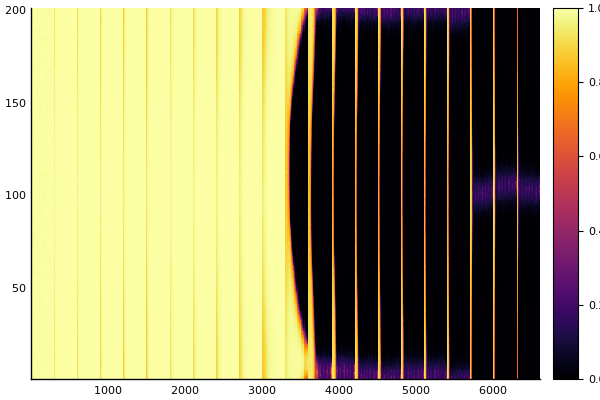

In [158]:
heatmap(hcat(s32_high...))

---

### 64 players with low starting prob

In [159]:
b64_low, s64_low, _ = load_run("more_players_no_inc_high_res/64_low/");
s64_low = shift_end_to_beginning.(s64_low);

In [160]:
s64_low_widths = [simple_width(length(p[:,end]) == 300 ? ϕ_300 : ϕ, p[:,end]) for p in s64_low];
#s64_low_widths[1] = 2π;

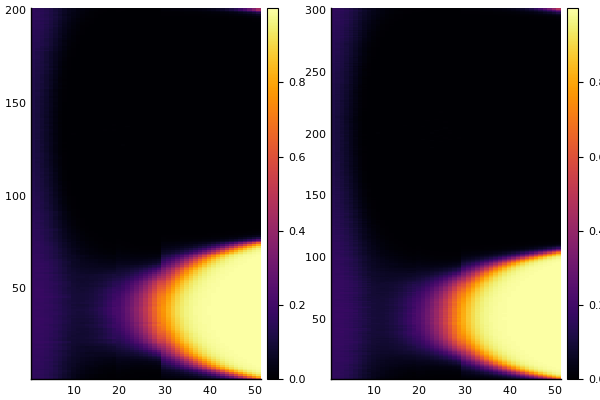

In [161]:
plot(heatmap(s64_low[4]), heatmap(s64_low[5]))

In [162]:
heatmap(hcat(s64_low...))

LoadError: ArgumentError: number of rows of each array must match (got (300, 300, 300, 200, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300))

---
### 64 players with high starting prob

In [164]:
b64_high, s64_high, _ = load_run("more_players_no_inc_high_res/64_high/");
s64_high = shift_end_to_beginning.(s64_high);

In [165]:
s64_high_widths = [simple_width(ϕ_300, p[:,end]) for p in s64_high];
#s64_low_widths[1] = 2π;

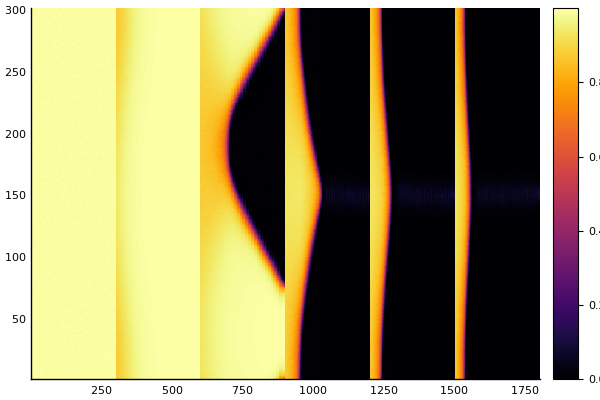

In [166]:
heatmap(hcat(s64_high...))

---

In [167]:
b16 = get_b(8, 2π, 0, 100000, 200)

3.692354881355276

In [168]:
crit_b8 = get_crit_b(8, 0, 100000, ϕ)

3.691464622230376

In [169]:
crit_b16 = get_crit_b(16, 0, 1000000, ϕ)

6.463572007451683

In [170]:
crit_b32 = get_crit_b(32, 0, 100000, ϕ)

11.989766327069018

### some plots

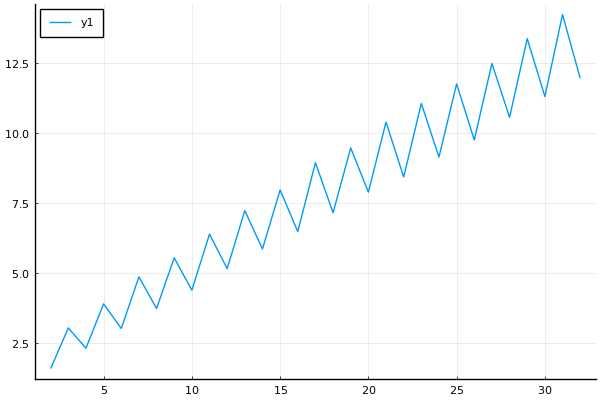

In [171]:
plot(2:32, [get_crit_b(i, 0, 10000, ϕ) for i in 2:32])

In [172]:
θ = 2π:-0.1:1

6.283185307179586:-0.1:1.083185307179586

In [173]:
b8_theo = get_b.(8, θ, 0, 10000, 200);

In [174]:
b16_theo = get_b.(16, θ, 0, 10000, 200);

In [175]:
b32_theo = get_b.(32, θ, 0, 10000, 200);

In [182]:
b32_theo_bias = get_b.(32, θ, 0, 10000, 200, -5);

In [177]:
b64_theo = get_b.(64, θ, 0, 10000, 300);

In [189]:
b16_low[10:end]

43-element Array{Any,1}:
 4.8
 4.9
 5.0
 5.1
 5.2
 5.3
 5.4
 5.5
 5.6
 5.7
 5.8
 5.9
 6.0
 ⋮
 7.9
 8.0
 8.1
 8.2
 8.3
 8.4
 8.5
 8.6
 8.7
 8.8
 8.9
 9.0

In [190]:
s16_low_widths[10:end]

43-element Array{Float64,1}:
 6.2517693806436885
 5.3092915845667505
 5.057964172279567
 4.869468613064179
 4.71238898038469
 4.6181412007769955
 4.461061568097506
 4.303981935418016
 4.146902302738527
 4.052654523130833
 3.8955748904513436
 3.7070793312359562
 3.5499996985564666
 ⋮
 1.1623892818282235
 1.0995574287564276
 1.0681415022205296
 1.0681415022205296
 1.0053096491487339
 0.9738937226128359
 0.9424777960769378
 0.9424777960769378
 0.91106186954104
 0.8796459430051421
 0.8482300164692442
 0.8482300164692442

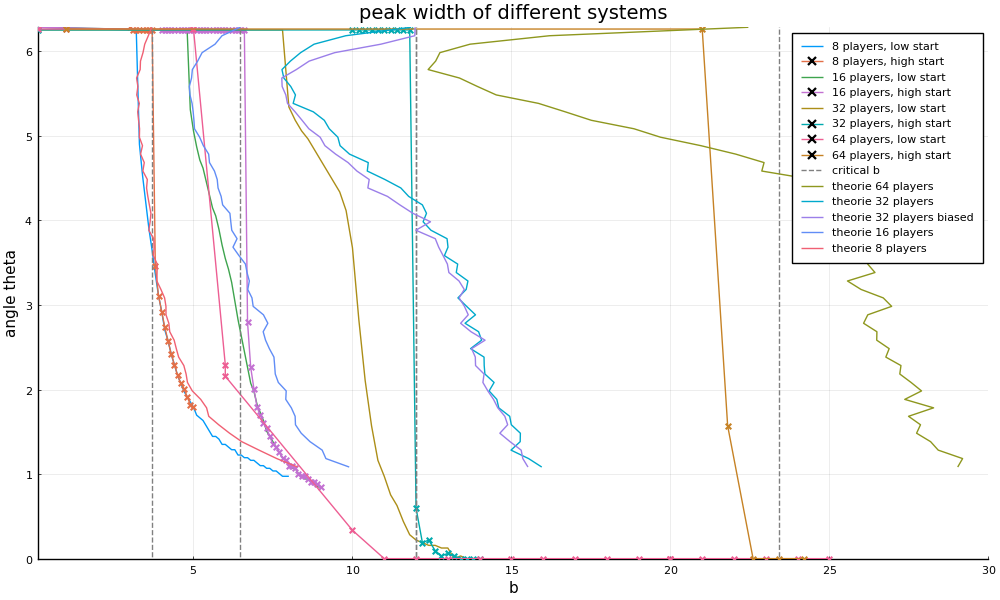

In [183]:
plot(b8_low, s8_low_widths, label="8 players, low start")
plot!(b8_high, s8_high_widths, label="8 players, high start", marker=:x)

plot!(b16_low, s16_low_widths, label="16 players, low start")
plot!(b16_high, s16_high_widths, label="16 players, high start", marker=:x)

plot!(b32_low, s32_low_widths, label="32 players, low start")

plot!(b32_high, s32_high_widths, label="32 players, high start", marker=:x)


plot!(b64_low, s64_low_widths, label="64 players, low start", marker=:x)
plot!(b64_high, s64_high_widths, label="64 players, high start", marker=:x)



vline!([crit_b8, crit_b16, crit_b32, 12, 23.4], label="critical b", c=:grey, ls=:dash)

plot!(b64_theo, θ, label="theorie 64 players")

plot!(b32_theo, θ, label="theorie 32 players")
plot!(b32_theo_bias, θ, label="theorie 32 players biased")


plot!(b16_theo, θ, label="theorie 16 players")
plot!(b8_theo, θ, label="theorie 8 players")

plot!(xlabel="b", ylabel="angle theta", title="peak width of different systems", xlims=(:auto, 30), ylims=(0, :auto), size=(1000, 600))

* plot utility as function of the angle
* run sim for even higher player counts
* debug (ask malte) the theoretical predictions

---
---

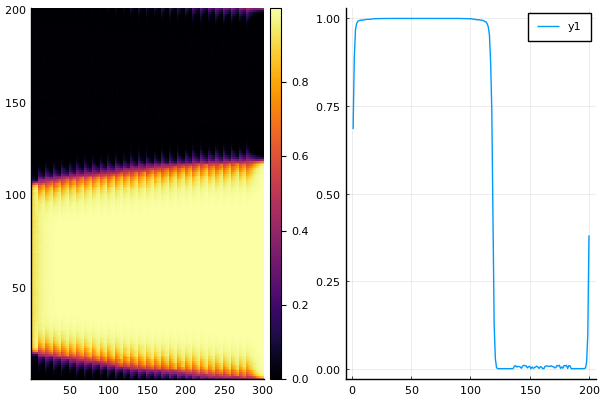

In [56]:
plot(heatmap(s32_low[18]), plot(s32_low[18][:,end]))

In [57]:
p_test = zeros(ϕ_res)
p_test[1:floor(Int, s32_low_widths[18]/2π * ϕ_res)] .= 1;

In [58]:
end_p = s32_low[18][:,end];
test_c = c32_low[18]

Config_small(1.0, 13.2, 0.0, 3.141592653589793, 32, 0.4545454545454546, 1000, 300)

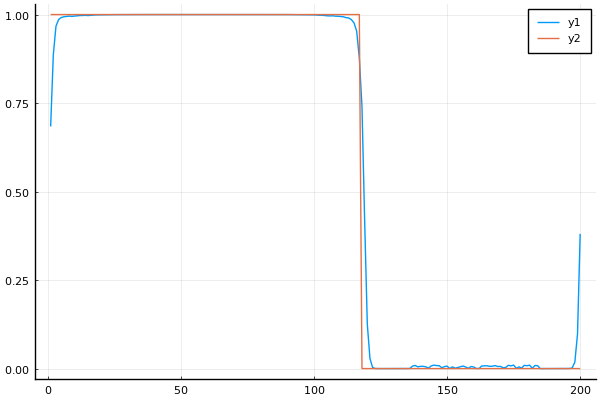

In [59]:
plot(end_p)
plot!(p_test)

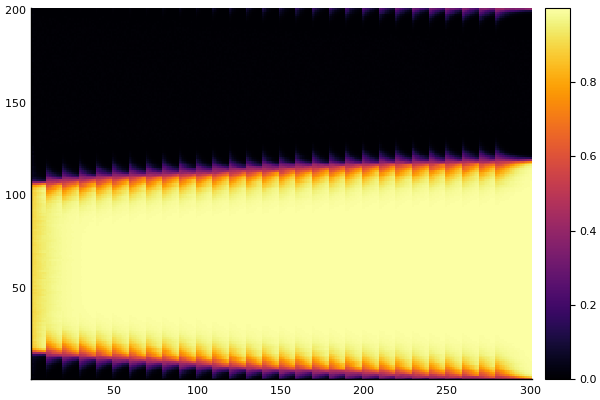

In [63]:
heatmap(s32_low[18])

In [ ]:
p_test = zeros(ϕ_res)
p_test[1:floor(Int, s32_low_widths[18]/2π * ϕ_res)] .= 1;

In [89]:
du_time = []
du_theo_time = []
c32_low[18].games = 100000
for x in eachcol(s32_low[18][:,9:10:end])
    width = simple_width(ϕ, x)
    first = findfirst(y->y>0.8, x)
    
    p_test = zeros(ϕ_res)
    p_test[1:floor(Int, width/2π * ϕ_res)] .= 1
    
    du_theo = Δu(1, ϕ, p_test, c32_low[18])
    du = Δu(first, ϕ, x, c32_low[18])
    push!(du_theo_time, du_theo[1])
    push!(du_time, du[1])
end

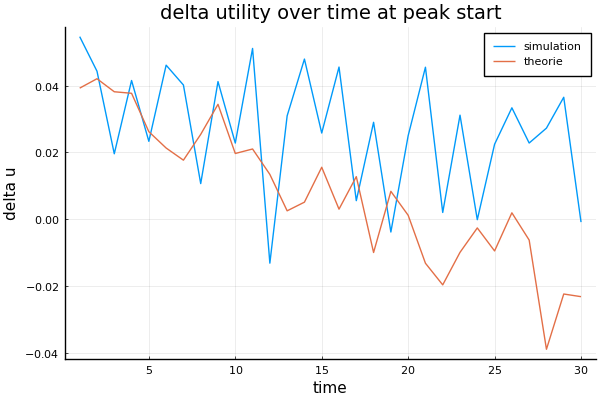

In [93]:
plot(du_time[1:end], label="simulation")
plot!(du_theo_time, label="theorie", title="delta utility over time at peak start", ylabel="delta u", xlabel="time")

In [107]:
test_c = Config_small(1.0, 13.2, 0.0, 3.141592653589793, 32, 0.4545454545454546, 10000, 300)

Config_small(1.0, 13.2, 0.0, 3.141592653589793, 32, 0.4545454545454546, 10000, 300)

In [108]:
p_test = zeros(ϕ_res)
p_test[1:floor(Int, s32_low_widths[18]/2π * ϕ_res)] .= 1
test_du = Δu_array(ϕ, s32_low[18][:, end], test_c)
test_theo_du = Δu_array(ϕ, p_test, test_c)

([-0.030388921009454447, 0.11192148028936988, 0.13332102348712416, 0.19535234465966445, 0.17530321416513325, 0.1597180415618524, 0.15263565397097328, 0.14610049748811627, 0.11719874685935597, 0.08978347709309581  …  -1.574323547097847, -1.4550641314383694, -1.3037237451328652, -1.1879077951331183, -0.9998734622539694, -0.8862130137305884, -0.7105256963705724, -0.5210911820963152, -0.40680451420376224, -0.2439441912204159], [0.9148, 0.9266, 0.9345, 0.9433, 0.9441, 0.9507, 0.9598, 0.9608, 0.9631, 0.9662  …  0.7807, 0.7914, 0.806, 0.8241, 0.8278, 0.8468, 0.8624, 0.8697, 0.8866, 0.9004])

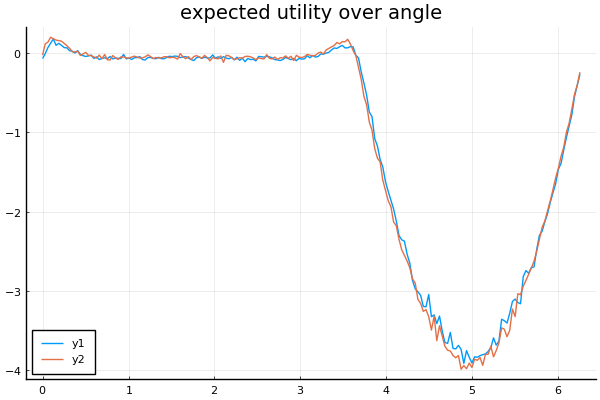

In [109]:
plot(ϕ, test_du)
plot!(ϕ, test_theo_du, title = "expected utility over angle")